In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot
from sdmetrics.column_pairs import ContingencySimilarity, CorrelationSimilarity

In [2]:
chapters = [4,5,6]

In [3]:
real_data = {}

for i in chapters:
    file_path = f"Final_datasets/Chapter {i}/chapter_{i}.csv"
    
    real_data[i] = pd.read_csv(file_path)
    
    if 'primary_icd9_code' in real_data[i].columns:
        real_data[i].drop(columns=['primary_icd9_code'], inplace=True)
    
    print(f"Test dataset for chapter {i} has {real_data[i].shape[0]} instances with {real_data[i].shape[1]} features")

all_real_data = pd.concat(real_data.values(), ignore_index=True)

print(f"Merged dataset has {all_real_data.shape[0]} instances with {all_real_data.shape[1]} features")

Test dataset for chapter 4 has 217 instances with 12 features
Test dataset for chapter 5 has 501 instances with 12 features
Test dataset for chapter 6 has 811 instances with 12 features
Merged dataset has 1529 instances with 12 features


In [4]:
all_real_data.head()

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,51,WHITE,EMERGENCY,Other disease of the blood,26,False,517.0,41.582258,8.452632,23.619048,1.500000
1,F,88,WHITE,EMERGENCY,Other disease of the blood,10,False,236.0,33.600197,8.700000,25.200000,0.900000
2,M,29,WHITE,EMERGENCY,Other disease of the blood,2,False,106.0,33.600197,8.873893,26.199079,11.785775
3,F,85,WHITE,EMERGENCY,Anemia,16,False,42.0,33.600197,8.200000,25.000000,6.400000
4,M,76,WHITE,EMERGENCY,Anemia,16,False,87.0,33.600197,7.700000,25.300000,7.900000


**Creation of Meta data**

Meta data are needed to evaluate the generated synthetic data

In [5]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(all_real_data)

Auto detected data:



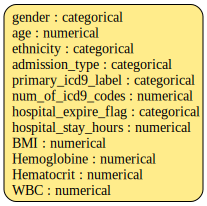

In [6]:
print('Auto detected data:\n')
metadata.visualize()

In [7]:
metadata.validate()
metadata.validate_data(data=all_real_data)

In [8]:
# metadata.save_to_json('test_datasets/metadata_chapter_4.json')

In [9]:
# in the future, we can reload the metadata object from the file
# metadata = SingleTableMetadata.load_from_json('test_datasets/metadata_chapter_4.json')

In [10]:
synthetic_data = {}

for i in chapters:
    file_path = f"Final_datasets/Chapter {i}/syn_data_chapter_{i}.csv"
    
    synthetic_data[i] = pd.read_csv(file_path, index_col=0)
    
    print(f"Test dataset for chapter {i} has {synthetic_data[i].shape[0]} instances with {synthetic_data[i].shape[1]} features")

all_synthetic_data = pd.concat(synthetic_data.values(), ignore_index=True)

print(f"Merged dataset has {all_synthetic_data.shape[0]} instances with {all_synthetic_data.shape[1]} features")

Test dataset for chapter 4 has 217 instances with 12 features
Test dataset for chapter 5 has 501 instances with 12 features
Test dataset for chapter 6 has 811 instances with 12 features
Merged dataset has 1529 instances with 12 features


In [11]:
all_synthetic_data.head()

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,52,WHITE,EMERGENCY,Other disease of the blood,17,False,289.812303,13.248336,13.240668,25.060606,19.364552
1,M,43,WHITE,EMERGENCY,Anemia,6,False,-57.245888,32.706534,10.107336,25.757634,21.539489
2,F,72,WHITE,EMERGENCY,Anemia,7,False,195.043047,7.697783,8.200341,25.220795,16.194215
3,M,89,WHITE,EMERGENCY,Other disease of the blood,13,False,760.375349,31.507931,8.575220,26.335406,21.402604
4,M,66,WHITE,EMERGENCY,Other disease of the blood,13,False,487.908238,32.289631,8.722646,18.483517,19.109902


In [12]:
diagnostic = run_diagnostic(
    real_data=all_real_data,
    synthetic_data=all_synthetic_data,
    metadata=metadata
)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:07<00:00,  7.68s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data

! The synthetic data is missing more than 10% of the categories present in the real data
! The synthetic data is missing more than 10% of the numerical ranges present in the real data


In [13]:
quality_report = evaluate_quality(
    all_real_data,
    all_synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 66/66 [00:00<00:00, 75.00it/s]

Overall Quality Score: 71.12%

Properties:
- Column Shapes: 79.89%
- Column Pair Trends: 62.35%


In [14]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.858731
1,age,KSComplement,0.856769
2,ethnicity,TVComplement,0.796599
3,admission_type,TVComplement,0.925441
4,primary_icd9_label,TVComplement,0.718770
5,num_of_icd9_codes,KSComplement,0.863963
6,hospital_expire_flag,TVComplement,0.962721
7,hospital_stay_hours,KSComplement,0.844343
8,BMI,KSComplement,0.724003
9,Hemoglobine,KSComplement,0.664487


In [15]:
for column in all_real_data.columns:
    # Generate the plot for the current column
    fig = get_column_plot(
        real_data=all_real_data,
        synthetic_data=all_synthetic_data,
        column_name=column,
        metadata=metadata
    )
    
    fig.show()

In [17]:
pairs = [['Hematocrit', 'BMI'], [ 'hospital_stay_hours', 'primary_icd9_label'], ['primary_icd9_label', 'num_of_icd9_codes']]

for p in pairs:
    fig = get_column_pair_plot(
        real_data=all_real_data,
        synthetic_data=all_synthetic_data,
        column_names=p,
        metadata=metadata
    )

    fig.show()

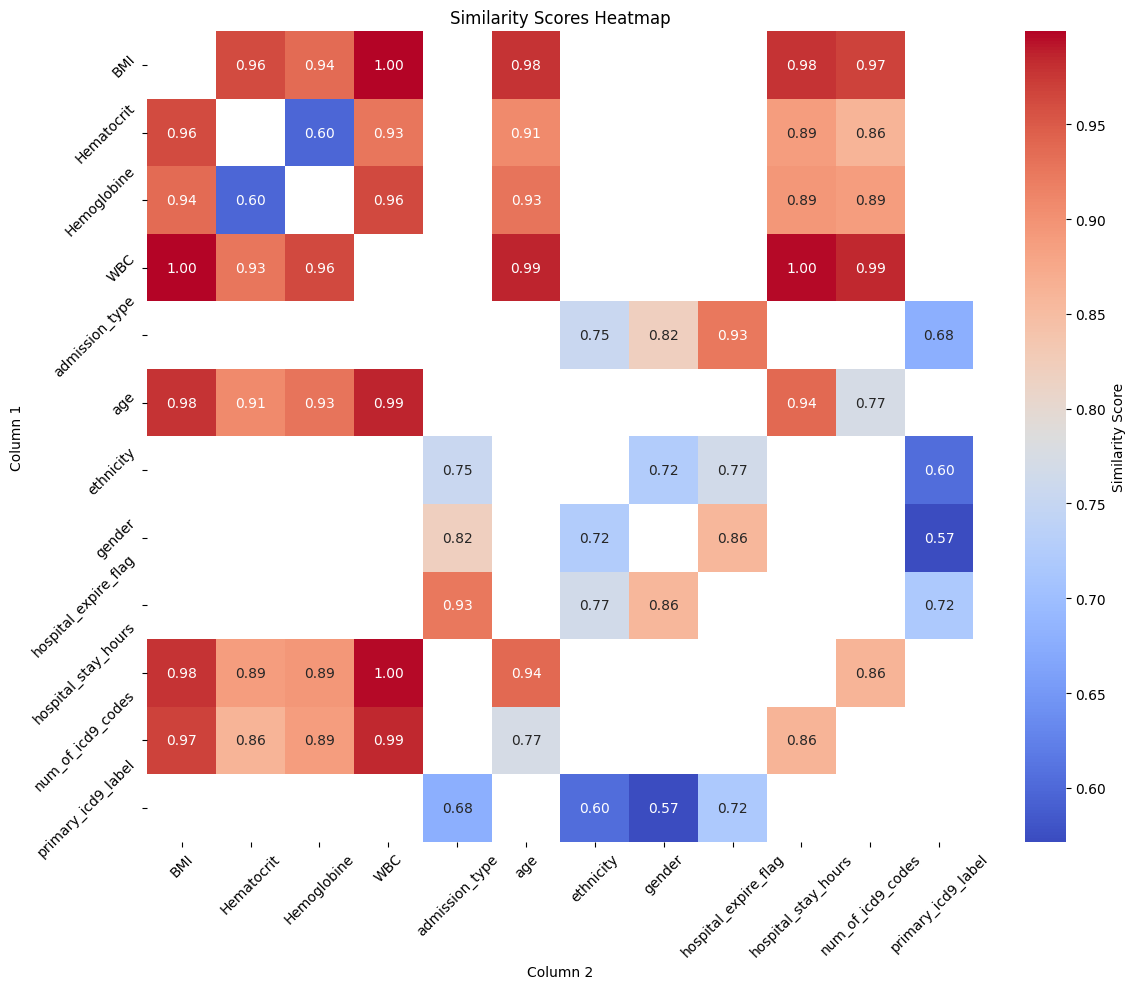

In [19]:
categorical_cols = ['gender', 'ethnicity', 'admission_type', 'primary_icd9_label']
binary_cols = ['hospital_expire_flag']
numerical_cols = ['age', 'num_of_icd9_codes', 'hospital_stay_hours', 'BMI', 'Hemoglobine', 'Hematocrit', 'WBC']

results = []
index = []

# Check combinations of columns and calculate the appropriate similarity metric
for col1 in all_real_data.columns:
    for col2 in all_real_data.columns:
        if col1 != col2:
            index.append((col1, col2))
            if col1 in categorical_cols + binary_cols and col2 in categorical_cols + binary_cols:
                # Use Contingency Similarity for categorical-binary pairs
                score = ContingencySimilarity.compute(
                    real_data=all_real_data[[col1, col2]],
                    synthetic_data=all_synthetic_data[[col1, col2]]
                )
                results.append({'Score': score, 'Metric': 'Contingency'})
            elif col1 in numerical_cols and col2 in numerical_cols:
                # Use Correlation Similarity for numerical pairs
                score = CorrelationSimilarity.compute(
                    real_data=all_real_data[[col1, col2]],
                    synthetic_data=all_synthetic_data[[col1, col2]],
                    coefficient='Pearson'
                )
                results.append({'Score': score, 'Metric': 'Correlation'})
            else:
                # Incompatible types for comparison
                results.append({'Score': np.nan, 'Metric': 'Incompatible', 'Reason': 'Type mismatch'})

results_df = pd.DataFrame(results, index=pd.MultiIndex.from_tuples(index, names=['Column 1', 'Column 2']))
results_df.reset_index(inplace=True)
score_matrix = results_df.pivot(index='Column 1', columns='Column 2', values='Score')

# Plotting the heatmap of scores
plt.figure(figsize=(12, 10))
sns.heatmap(score_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Similarity Score'}, mask=score_matrix.isnull())
plt.title('Similarity Scores Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
